In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
print("Setup Complete")

Setup Complete


In [2]:
train_path = "/kaggle/input/data-clean-2/data_clean_2.csv"

train_data = pd.read_csv(train_path)

In [3]:
train_data.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,1,...,1,0,0,0,1,0,0,0,1,0
1,1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,...,0,0,1,0,0,1,0,1,0,0
2,2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,1,...,1,0,0,0,1,0,0,0,1,0
3,3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,...,0,0,1,1,0,0,0,0,1,0
4,4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,1,...,0,0,1,0,1,0,0,0,0,1


In [4]:
train_data.shape

(14204, 24)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 14204 non-null  int64  
 1   Item_Identifier            14204 non-null  object 
 2   Item_Weight                14204 non-null  float64
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Item_Outlet_Sales          14204 non-null  float64
 9   Item_Fat_Content_0         14204 non-null  int64  
 10  Item_Fat_Content_1         14204 non-null  int64  
 11  Outlet_Size_0              14204 non-null  int64  
 12  Outlet_Size_1              14204 non-null  int64  
 13  Outlet_Size_2              14204 non-null  int

In [6]:
train_data.isnull().sum()

Unnamed: 0                   0
Item_Identifier              0
Item_Weight                  0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Item_Fat_Content_0           0
Item_Fat_Content_1           0
Outlet_Size_0                0
Outlet_Size_1                0
Outlet_Size_2                0
Outlet_Location_Type_0       0
Outlet_Location_Type_1       0
Outlet_Location_Type_2       0
Outlet_Type_0                0
Outlet_Type_1                0
Outlet_Type_2                0
Outlet_Type_3                0
Item_Type_Combined_0         0
Item_Type_Combined_1         0
Item_Type_Combined_2         0
dtype: int64

In [7]:
train_data.describe()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,...,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.00000,14204.000000,14204.000000
mean,7101.500000,12.792854,0.069710,141.004977,1997.830681,2026.522094,0.646649,0.353351,0.109335,0.610462,...,0.280203,0.326739,0.393058,0.127077,0.654323,0.108843,0.109758,0.09272,0.718178,0.189102
std,4100.485947,4.234226,0.049728,62.086938,8.371664,1335.388924,0.478027,0.478027,0.312071,0.487663,...,0.449114,0.469037,0.488447,0.333071,0.475605,0.311453,0.312599,0.29005,0.449903,0.391603
min,0.000000,4.555000,0.003575,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3550.750000,9.300000,0.031145,94.012000,1987.000000,1468.089000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,7101.500000,12.792854,0.057194,142.247000,1999.000000,1794.331000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,10652.250000,16.000000,0.096930,185.855600,2004.000000,2163.184200,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,14203.000000,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# **PreProcessing Data**

> **Created a list remove_cols to remove those columns which doesn't required for Model Building**

In [8]:
remove_cols = ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year']
train_data = train_data.drop(remove_cols,axis =1)
train_data.head()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,0,9.30,0.016047,249.8092,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,1,5.92,0.019278,48.2692,443.4228,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,2,17.50,0.016760,141.6180,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,3,19.20,0.017834,182.0950,732.3800,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,4,8.93,0.009780,53.8614,994.7052,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [9]:
x = train_data.drop('Item_Outlet_Sales',axis = 1)
y = train_data['Item_Outlet_Sales']

In [10]:
print(x.shape,y.shape)

(14204, 19) (14204,)


In [11]:
x.head()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,0,9.30,0.016047,249.8092,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,1,5.92,0.019278,48.2692,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,2,17.50,0.016760,141.6180,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,3,19.20,0.017834,182.0950,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,4,8.93,0.009780,53.8614,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [12]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# **Modeling**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix

**Splitting Training And Test Data**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

In [16]:
# calculate median and IQR  
robust_scaler.fit(train_data)

RobustScaler()

In [17]:
robust_scaled_data = robust_scaler.transform(train_data)

In [18]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
# combine both fit & transform into one call
standard_scaled_data = standard_scaler.fit_transform(train_data)

# dataframe with both standard and robust scaled values
scaled_values = pd.DataFrame({
    'Standard': standard_scaled_data.reshape(-1),
    'Robust': robust_scaled_data.reshape(-1)
})

# **Standard Scaling 06m Robust Scaling**

# **Linear Regression**

**Create a model and fit it**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
predicted= model.predict(x_test)

In [23]:
print("MEAN SQUARED ERROR(MSE): ",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE): ",mean_absolute_error(y_test,predicted))
rsme_model = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE): ",rsme_model)
print("SCORE: ",model.score(x_test,y_test))

MEAN SQUARED ERROR(MSE):  1210166.2874939414
MEAN ABSOLUTE ERROR(MAE):  818.9023795005764
ROOT MEAN SQUARED ERROR(RMSE):  1.4151591099935255
SCORE:  0.33153956619102964


# **Random Forest**

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfg=RandomForestRegressor()

In [26]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
predicted= rfg.predict(x_test)

In [28]:
print("MEAN SQUARED ERROR(MSE): ",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE): ",mean_absolute_error(y_test,predicted))
rsme_rfg = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE): ",rsme_rfg)
print("SCORE: ",rfg.score(x_test,y_test))

MEAN SQUARED ERROR(MSE):  798662.5303878655
MEAN ABSOLUTE ERROR(MAE):  479.3824728602667
ROOT MEAN SQUARED ERROR(RMSE):  0.8649997150025815
SCORE:  0.5588421962773316


# **Regularized Linear Regression**

**Ridge Regression**

In [29]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.05,normalize=True)

In [30]:
model_ridge.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.05, normalize=True)

In [31]:
predicted= model_ridge.predict(x_test)

In [32]:
print("MEAN SQUARED ERROR(MSE): ",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE): ",mean_absolute_error(y_test,predicted))
rsme_model_ridge = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE): ",rsme_model_ridge)
print("SCORE: ",model_ridge.score(x_test,y_test))

MEAN SQUARED ERROR(MSE):  1208660.391391039
MEAN ABSOLUTE ERROR(MAE):  815.0084502748227
ROOT MEAN SQUARED ERROR(RMSE):  1.465241826365008
SCORE:  0.3323713791184102


# **XGBoost**

In [33]:
import xgboost 
from xgboost import XGBRegressor

In [34]:
xgb = XGBRegressor()
     
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [35]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [36]:
predicted= xgb.predict(x_test)

In [37]:
print("MEAN SQUARED ERROR(MSE): ",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE): ",mean_absolute_error(y_test,predicted))
rsme_xgb = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE): ",rsme_xgb)
print("SCORE: ",xgb.score(x_test,y_test))

MEAN SQUARED ERROR(MSE):  894198.1216053636
MEAN ABSOLUTE ERROR(MAE):  552.503970043994
ROOT MEAN SQUARED ERROR(RMSE):  1.0703714730714213
SCORE:  0.5060711321604385


# **Final Predictions & It's Visualization**

In [38]:
model = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest','Regularized Linear Regression','XGBoost'],'RMSE_mean': [rsme_model,rsme_rfg,rsme_model_ridge,rsme_xgb]})

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Plotting based on Model and RSME')

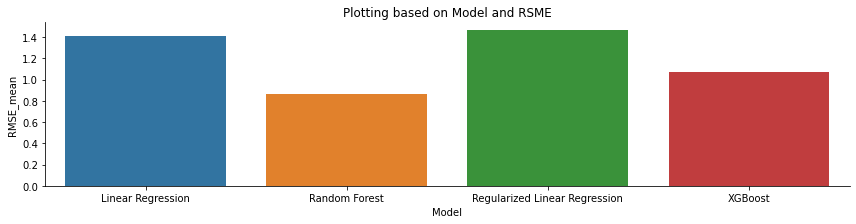

In [39]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', kind='bar',data= model, size=3, aspect=4)
plt.title('Plotting based on Model and RSME')